### Student Information
Name : 黃苡溱

Student ID : 112065534

GitHub ID : blackanana

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

## Table of Contents
1. The Data
2. Data Preparation
3. Data Mining using Pandas
 - 3.1 Dealing with Missing Values
 - 3.2 Dealing with Duplicate Data
4. Data Preprocessing
 - 4.1 Sampling
 - 4.2 Feature Creation
 - 4.3 Feature Subset Selection
 - 4.4 Dimensionality Reduction
 - 4.5 Atrribute Transformation / Aggregation
 - 4.6 Discretization and Binarization
5. Data Exploration
 - 5.1 Cosine Similarity
 - 5.2 New Data Visualization
 - 5.3 TF-IDF
 - 5.4 Naive Bayes Classifier
6. Conclusion

---

## ** Second **

## 1. The Data

In [8]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import csv
import sys
sys.path.append('/Users/blackanana/DMLab1/DM2023-Lab1-Master')
from helpers import data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline

---

## 2. Data Preparation

Create a new dataframe with three columns('sentence', 'score', 'source').
<br>
Import each files into it and give rows new index.

In [10]:
# 建立一個空的 dataframe
sentiment_data = pd.DataFrame(columns=['sentence', 'score', 'source'])

# 檔案路徑
file_paths = [
    '/Users/blackanana/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/amazon_cells_labelled.txt',
    '/Users/blackanana/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/imdb_labelled.txt',
    '/Users/blackanana/DMLab1/DM2023-Lab1-Master/Homework/sentiment labelled sentences/yelp_labelled.txt'
]

# 讀取檔案建立新的 dataframe
for file_path in file_paths:
    data = pd.read_csv(file_path, sep='\t', names=['sentence', 'score'], quoting=csv.QUOTE_NONE) # 處理特殊符號
    source_name = file_path.split('/')[-1].split('_')[0]  # 從檔名提取 source_name
    data['source'] = source_name # 添加 source 資料
    sentiment_data = pd.concat([sentiment_data, data], ignore_index=True) # index 重新編號

Add a new column named 'score_meaning' and determine each 'score' of rows is 1 or 0.

In [11]:
sentiment_data['score_meaning'] = sentiment_data['score'].apply(lambda x: 'negative' if x == 0 else 'positive')

Reorder the columns and display the new dataframe.

In [12]:
sentiment_data = sentiment_data[['sentence', 'score', 'score_meaning', 'source']]
sentiment_data

,sentence,score,score_meaning,source
0,So there is no way for me to plug it in here i...,0,negative,amazon
1,"Good case, Excellent value.",1,positive,amazon
2,Great for the jawbone.,1,positive,amazon
3,Tied to charger for conversations lasting more...,0,negative,amazon
4,The mic is great.,1,positive,amazon
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,yelp
2996,Appetite instantly gone.,0,negative,yelp
2997,Overall I was not impressed and would not go b...,0,negative,yelp
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp


Analyze & check the type, length, shape and so on.

In [13]:
type(sentiment_data)
len(sentiment_data)
sentiment_data.shape

(3000, 4)

Using different methods to query the data.

In [14]:
# a simple query
# sentiment_data['sentence'][8]
for i in sentiment_data['sentence'][:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [15]:
# using iloc (by position)
sentiment_data.iloc[[0,2],sentiment_data.columns.get_indexer(['source','score'])]
sentiment_data.iloc[2]
sentiment_data.iloc[8,sentiment_data.columns.get_loc('sentence')]

'Needless to say, I wasted my money.'

In [16]:
# using loc (by label)
sentiment_data.loc[::10, 'sentence'][0:5]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
Name: sentence, dtype: object

In [17]:
# sentiment_data[sentiment_data['score']==0][::10][:5]
sentiment_data.loc[lambda f:f.source=='imdb'].iloc[0:1000:5][1:100]

,sentence,score,score_meaning,source
1005,"The rest of the movie lacks art, charm, meanin...",0,negative,imdb
1010,And those baby owls were adorable.,1,positive,imdb
1015,It had some average acting from the main perso...,0,negative,imdb
1020,I can think of no other film where something v...,1,positive,imdb
1025,This short film certainly pulls no punches.,0,negative,imdb
...,...,...,...,...
1475,The dialogue is composed of things that make l...,0,negative,imdb
1480,The acting by the whole cast could be put on a...,0,negative,imdb
1485,"This movie was kind of long in length, but I e...",1,positive,imdb
1490,"Totally different, with loads of understatemen...",1,positive,imdb


---

## 3. Data Mining using Pandas

### 3.1 Dealing with Missing Values

In [18]:
# check missing values
sentiment_data.isnull()
sentiment_data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,score_meaning,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [19]:
sentiment_data.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### 3.2 Dealing with duplicated data.

In [20]:
# find out 17 dupliacted data
sum(sentiment_data.duplicated())

17

In [21]:
# check where is duplocated data
counts = sentiment_data['sentence'].value_counts().reset_index()
counts.columns = ['sentence', 'count']
counts

,sentence,count
0,Great phone.,2
1,Not recommended.,2
2,Works great.,2
3,I won't be back.,2
4,I love this place.,2
...,...,...
2978,The Songs Were The Best And The Muppets Were S...,1
2979,It Was So Cool.,1
2980,"This is a very ""right on case"" movie that deli...",1
2981,It had some average acting from the main perso...,1


In [22]:
# delete the duplicated data
sentiment_data.drop_duplicates(keep=False, inplace=True)

In [23]:
# check the length of whole data after drop_dupicates()
len(sentiment_data)

2966

---

## 4.  Data Preprocessing

### 4.1 Sampling

In [24]:
# random select 1000 rows
sentiment_sample = sentiment_data.sample(n=1000,random_state=41) #random state
display(sentiment_sample)
# type(sentiment_sample)
# len(sentiment_sample)

,sentence,score,score_meaning,source
787,It is simple to use and I like it.,1,positive,amazon
384,Magical Help.,1,positive,amazon
1435,"An interesting premise, and Billy Drago is alw...",1,positive,imdb
2738,I love the decor with the Chinese calligraphy ...,1,positive,yelp
1684,This is definitely one of the better documenta...,1,positive,imdb
...,...,...,...,...
1037,"Buy it, play it, enjoy it, love it.",1,positive,imdb
92,Worked great!.,1,positive,amazon
416,An Awesome New Look For Fall 2000!.,1,positive,amazon
2869,The feel of the dining room was more college c...,0,negative,yelp


In [25]:
sentiment_sample.iloc[50]
# sentiment_sample.iloc[1,sentiment_sample.columns.get_loc('sentence')]

sentence         There are many continuity errors: one other us...
score                                                            0
score_meaning                                             negative
source                                                        imdb
Name: 1685, dtype: object

### matplotlib
see score distribution between original data and samlpe

(0.0, 1536.0)

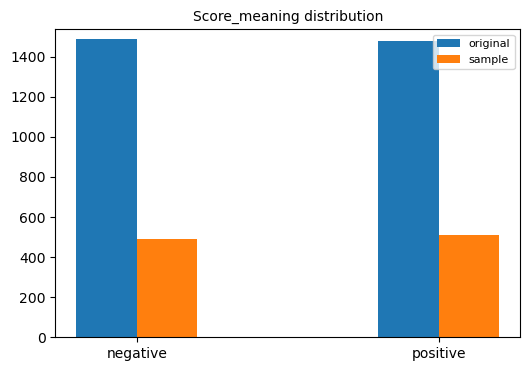

In [26]:
import numpy as np;np.random.seed(41)

d1 = sentiment_data.score_meaning.value_counts()
d2 = sentiment_sample.score_meaning.value_counts().loc[d1.index]

upper_bound = max(sentiment_data.score_meaning.value_counts())+50

plt.figure(figsize=(6,4))
plt.title('Score_meaning distribution', fontsize=10)
bar_width = 0.2
meaning= d1.index
x = range(len(meaning))

# 'X' series
plt.bar(x, d1, width=bar_width, label='original')

# 'X_sample' series # 向右偏bar_width
plt.bar([i + bar_width for i in x], d2, width=bar_width, label='sample')

# 放置圖例
plt.legend(loc=1, prop={'size': 8})

# 設定x軸標籤
plt.xticks([i + bar_width / 2 for i in x], meaning, rotation=0)

# 設定y軸上限
plt.ylim(0, upper_bound)


see 'score_meaning' distribution among yelp, amazon and imdb in original dataframe

Text(0.5, 1.0, 'negative')

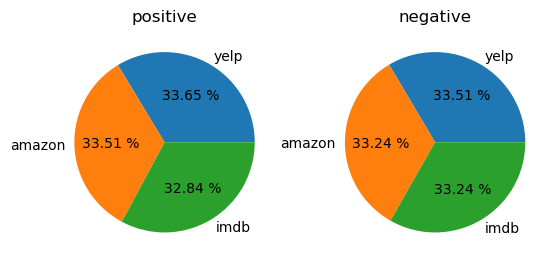

In [27]:
plt.subplot(1, 2, 1)
positive = sentiment_data.loc[(sentiment_data['score_meaning']=='positive')]
label = ["yelp","amazon","imdb"]
p_count = positive.source.value_counts()
plt.pie(p_count,labels=label,autopct='%.2f %%')
plt.title('positive')

plt.subplot(1, 2, 2)
negative = sentiment_data.loc[(sentiment_data['score_meaning']=='negative')]
label = ["yelp","amazon","imdb"]
n_count = negative.source.value_counts()
plt.pie(n_count,labels=label,autopct='%.2f %%')
plt.title('negative')

see 'score_meaning' distribution among yelp, amazon and imdb in sample dataframe

Text(0.5, 1.0, 'negative')

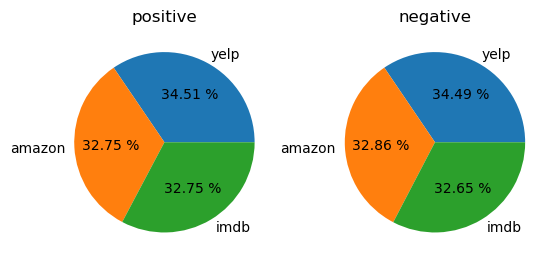

In [28]:
plt.subplot(1, 2, 1)
positive = sentiment_sample.loc[(sentiment_sample['score_meaning']=='positive')]
label = ["yelp","amazon","imdb"]
p_count = positive.source.value_counts()
plt.pie(p_count,labels=label,autopct='%.2f %%')
plt.title('positive')

plt.subplot(1, 2, 2)
negative = sentiment_sample.loc[(sentiment_sample['score_meaning']=='negative')]
label = ["yelp","amazon","imdb"]
n_count = negative.source.value_counts()
plt.pie(n_count,labels=label,autopct='%.2f %%')
plt.title('negative')

### 4.2 Feature Creation

import nltk and tokenize each sentence in 'sentiment_data' dataframe

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blackanana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
sentiment_data['unigrams'] = sentiment_data['sentence'].apply(lambda x: dmh.tokenize_text(x))
sentiment_data
# list(sentiment_data[0:1]['unigrams'])

,sentence,score,score_meaning,source,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]"
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,yelp,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,negative,yelp,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,negative,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp,"[The, whole, experience, was, underwhelming, ,..."


### 4.3 Feature subset selection

use scikit learn built in functionalities to generate this document

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentence_counts = count_vect.fit_transform(sentiment_data.sentence)

print(sentence_counts.shape)
# print(sentence_counts[0])
# count_vect.get_feature_names_out()[5111]

(2966, 5153)


In [32]:
# to make the matrix more condensed
analyze = count_vect.build_analyzer()
analyze(" ".join(list(sentiment_data[1:2].sentence)))

['good', 'case', 'excellent', 'value']

In [33]:
print(count_vect.get_feature_names_out()[-10:])

['yucky' 'yukon' 'yum' 'yummy' 'yun' 'z500a' 'zero' 'zillion' 'zombie'
 'zombiez']


In [34]:
# we convert from sparse array to normal array
sentence_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [35]:
findone_array=sentence_counts[3:4,0:100].toarray()
find_one=np.where(findone_array==1)
print(count_vect.get_feature_names_out()[45])

45


### seaborn
built a heat map to see word frequency in the sample dataframe

In [36]:
find_more_one=np.argwhere(sentence_counts[0:,0:100]>1)
print(find_more_one)

[[ 520   96]
 [1203   75]
 [1279    1]
 [1411    1]
 [1463    1]
 [1607    1]
 [1627    1]
 [1662    1]
 [1747   75]
 [1765   75]
 [1778   75]
 [1810   75]]


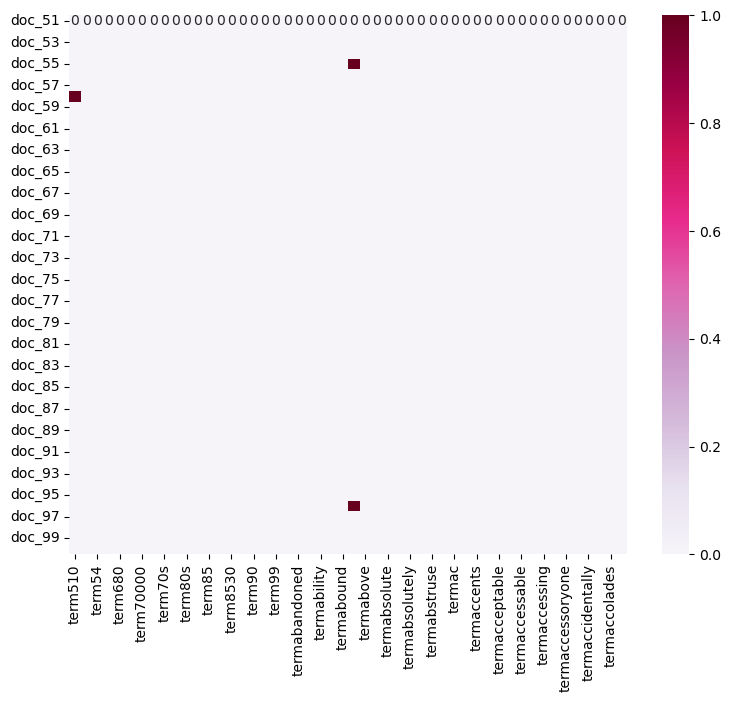

In [37]:
plot_x=["term"+str(i) for i in count_vect.get_feature_names_out()[50:100]]
plot_y=["doc_"+ str(i) for i in list(sentiment_data.index)[50:100]]
plot_z=sentence_counts[50:100,50:100].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 4.4 Dimensionality Reduction
[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [38]:
from sklearn.decomposition import PCA
sentence_reduced = PCA(n_components = 2).fit_transform(sentence_counts.toarray())
print(sentence_reduced.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [39]:
sentence_reduced

array([[ 0.51682779,  0.27898738],
       [-0.90241343, -0.36283057],
       [ 0.0140789 , -0.66630418],
       ...,
       [-0.50570298,  0.41597344],
       [ 0.49212522,  0.36941754],
       [ 2.32719771, -0.47736493]])

In [40]:
label

['yelp', 'amazon', 'imdb']

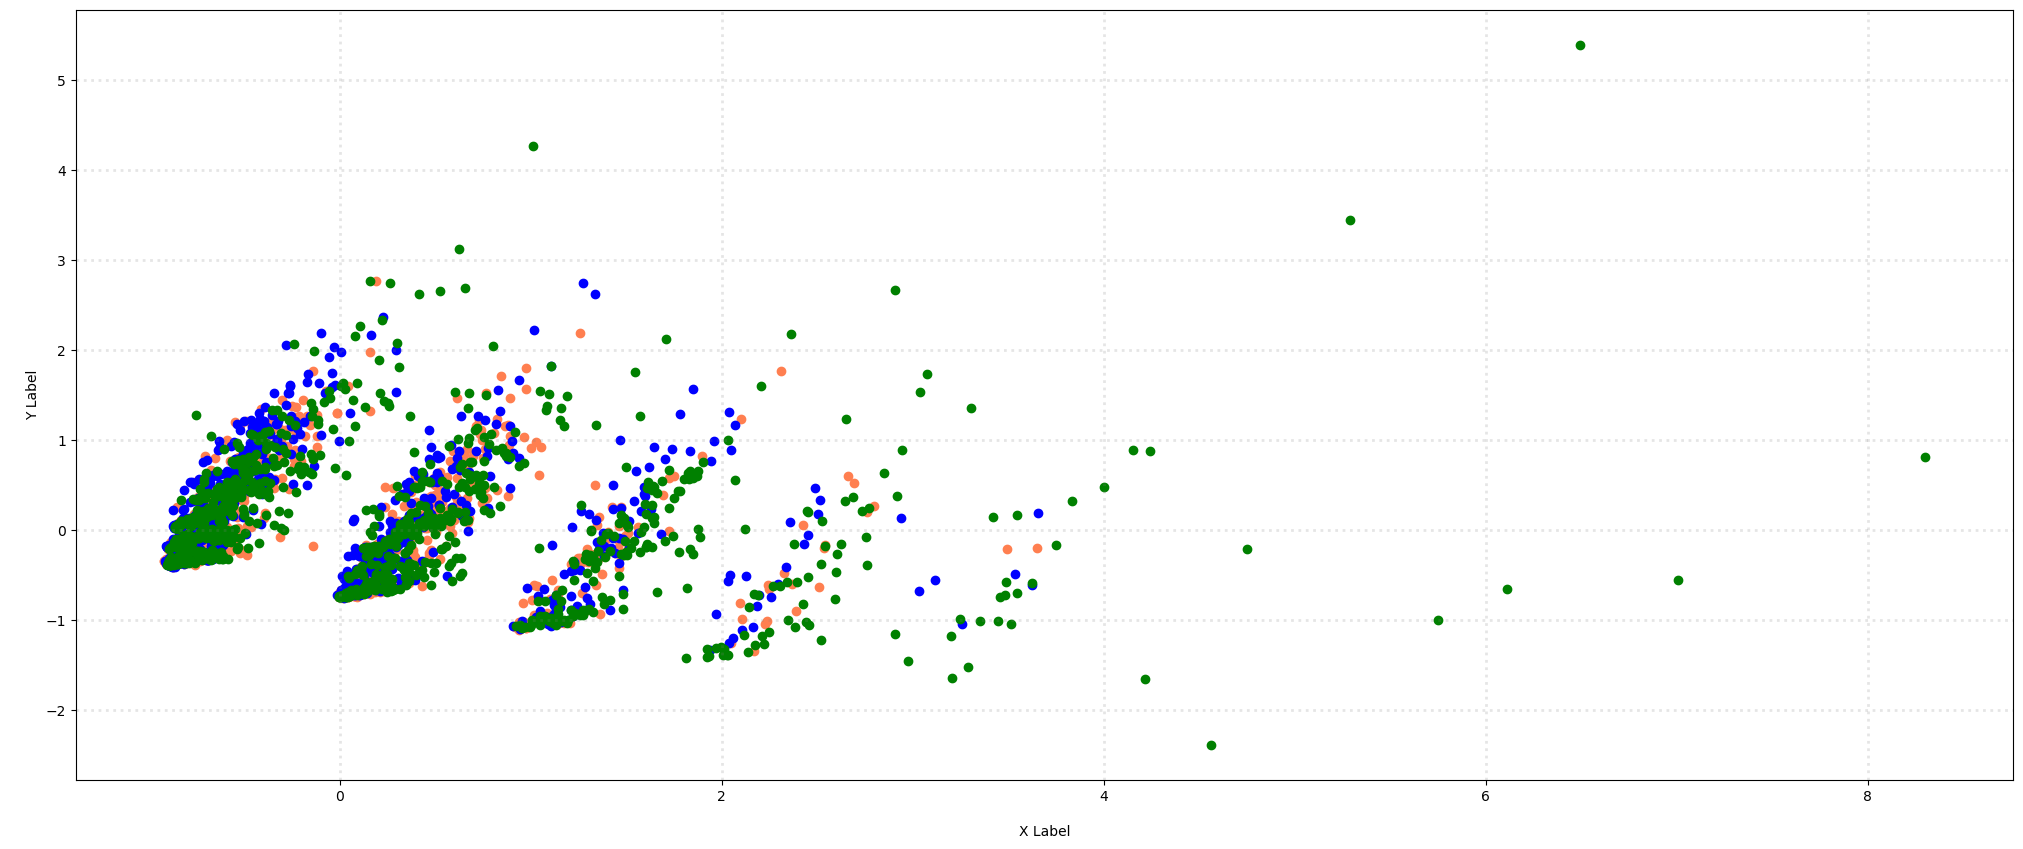

In [41]:
col = ['coral', 'blue', 'green']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, labels in zip(col, label):
    xs = sentence_reduced[sentiment_data['source'] == labels].T[0]
    ys = sentence_reduced[sentiment_data['source'] == labels].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


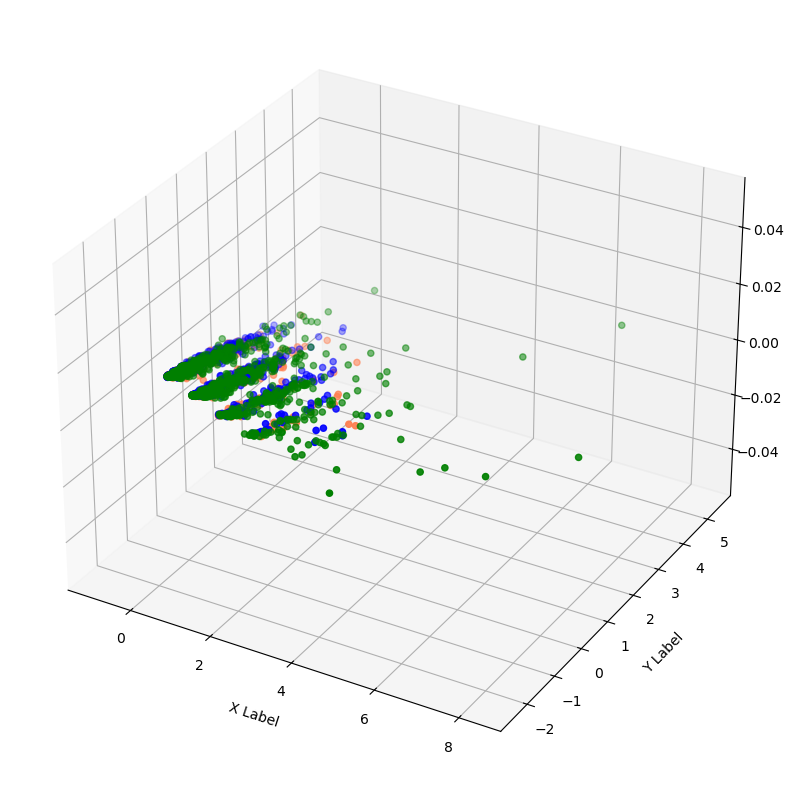

In [42]:
from sklearn.decomposition import PCA

sentence_reduced = PCA(n_components = 3).fit_transform(sentence_counts.toarray())

col = ['coral', 'blue', 'green']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, labels in zip(col, label):
    xs = sentence_reduced[sentiment_data['source'] == labels].T[0]
    ys = sentence_reduced[sentiment_data['source'] == labels].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 4.5 Attribute Transformation / Aggregation

In [43]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,sentence_counts.shape[1]):
    term_frequencies.append(sum(sentence_counts[:,j].toarray()))

In [44]:
term_frequencies = np.asarray(sentence_counts.sum(axis=0))[0]

In [45]:
term_frequencies

array([ 1, 34,  3, ...,  1,  2,  1])

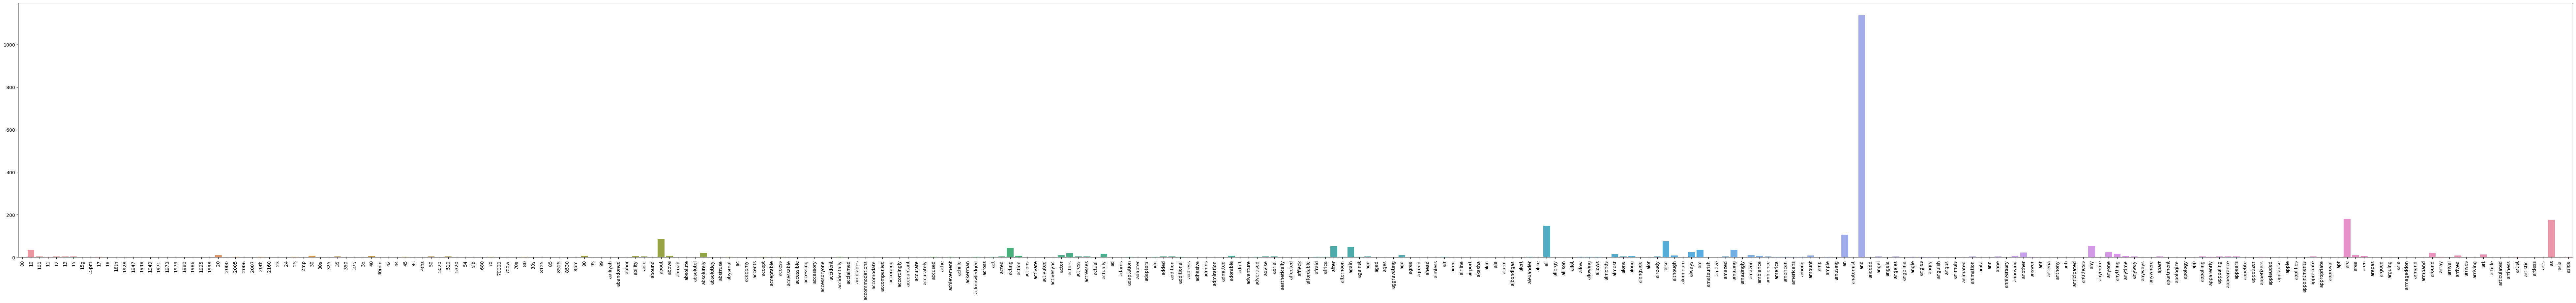

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [47]:
import plotly.express as px

df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies[:300]})

fig = px.bar(df, x='Term', y='Frequency', text='Frequency', title='Top 300')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency')
fig.update_xaxes(categoryorder='total descending')

fig.show()

In [48]:
df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:50], 'Frequency': term_frequencies[:50]})

fig = px.bar(df, x='Term', y='Frequency', text='Frequency', title='Top 50')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency')
fig.update_xaxes(categoryorder='total descending')

fig.show()

In [49]:
n_terms = 50

# Sort terms by frequency and select the top N terms
sorted_terms, sorted_frequencies = zip(*sorted(zip(count_vect.get_feature_names_out(), term_frequencies), key=lambda x: x[1], reverse=True)[:n_terms])

# Create a DataFrame for the top N terms
top_terms_df = pd.DataFrame({'Term': sorted_terms, 'Frequency': sorted_frequencies})

# Create the bar chart with only the top N terms
fig = px.bar(top_terms_df, x='Term', y='Frequency', text='Frequency', title=f'Top {n_terms} Terms')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency')
fig.update_xaxes(categoryorder='total descending')

fig.show()

In [50]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


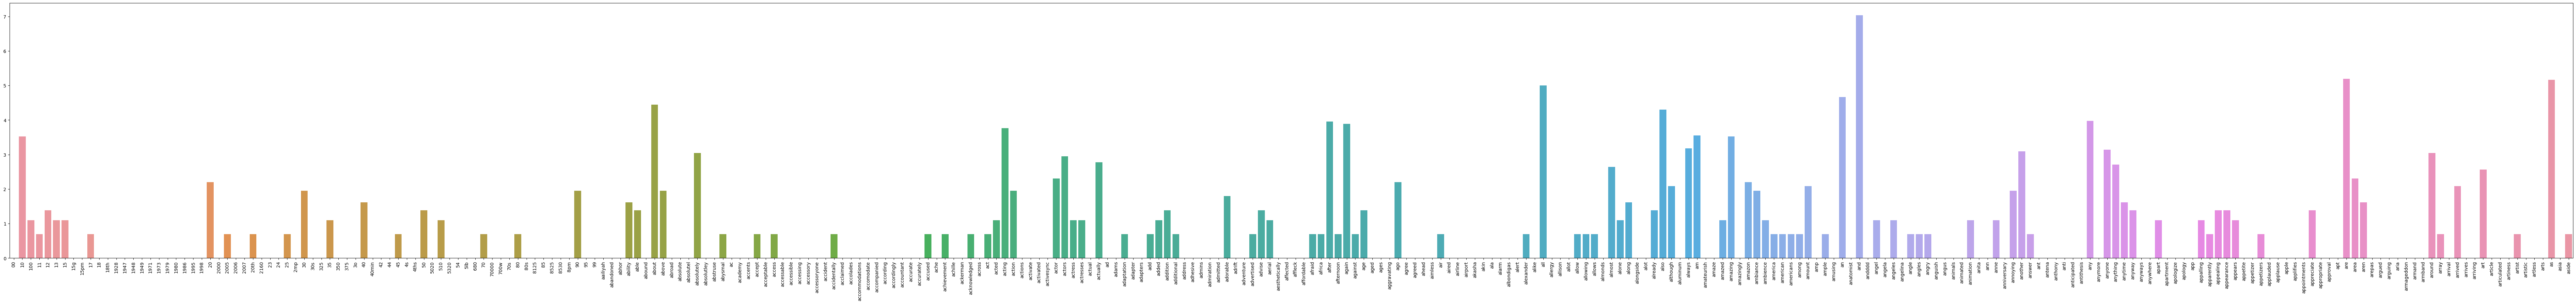

In [51]:
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 4.6 Discretization and Binarization

In [52]:
from sklearn import preprocessing

# one-hot encoding
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_data.source)
sentiment_data['bin_source'] = mlb.transform(sentiment_data['source']).tolist()
sentiment_data

,sentence,score,score_meaning,source,unigrams,bin_source
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2996,Appetite instantly gone.,0,negative,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,negative,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


## 5. Data Exploration

### 5.1 Cosine Similarity

In [53]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = sentiment_data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiment_data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiment_data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [54]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [55]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [56]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

## ** Third **

### 5.2 New Data Visualization

- Bar chart

In [57]:
# generate a simple distribution
count_vect = CountVectorizer(min_df=100)
sentence_counts = count_vect.fit_transform(sentiment_data.sentence)
term_frequencies = []
for j in range(0,sentence_counts.shape[1]):
    term_frequencies.append(sum(sentence_counts[:,j].toarray()))

term_frequencies = np.asarray(sentence_counts.sum(axis=0))[0]

# reverse the term_frequency array
sorted_array = np.sort(term_frequencies)
reverse_array = sorted_array[::-1]

# create a long tail bar
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(100,100))
sns.barplot(x=count_vect.get_feature_names_out(),
            y=reverse_array, alpha=1.0)

plt.xticks(rotation=90)
ax2 = ax1.twinx()
sns.lineplot(x=count_vect.get_feature_names_out(),
           y=reverse_array, 
             color='red',linewidth=5)

<Axes: >

- Box Plot

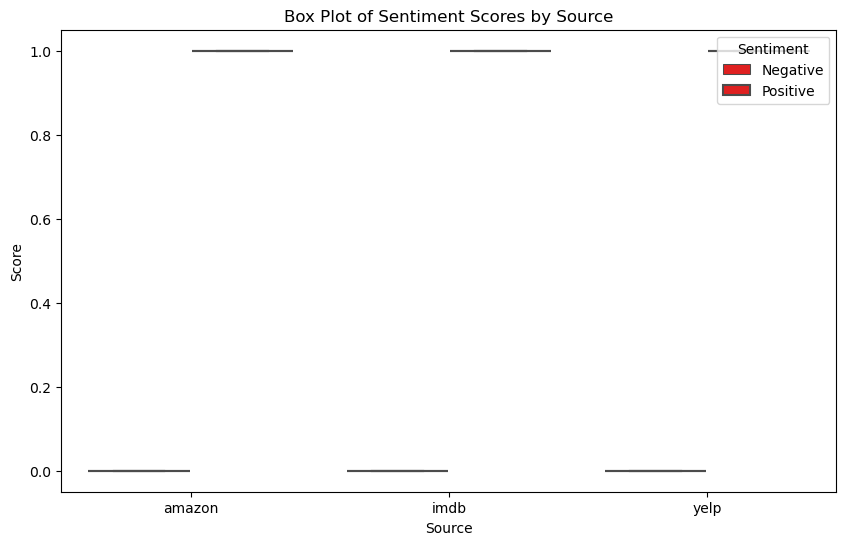

In [83]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='source', y='score', data=sentiment_data, hue='score_meaning', palette=['red', 'blue'])

plt.title('Box Plot of Sentiment Scores by Source')
plt.xlabel('Source')
plt.ylabel('Score')

plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()

### 5.3 TF-IDF Features

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

amazon_list = sentiment_data.loc[lambda f:f.source=='amazon'].iloc[0:]['sentence'].tolist()
tf_idf_scores = vectorizer.fit_transform(amazon_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
print(tf_idf_scores.shape)
print(df_tfidf)

imdb_list = sentiment_data.loc[lambda f:f.source=='imdb'].iloc[0:]['sentence'].tolist()
tf_idf_scores = vectorizer.fit_transform(imdb_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
print(tf_idf_scores.shape)
print(df_tfidf)

yelp_list =sentiment_data.loc[lambda f:f.source=='yelp'].iloc[0:]['sentence'].tolist()
tf_idf_scores = vectorizer.fit_transform(yelp_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
print(tf_idf_scores.shape)
print(df_tfidf)

1845
(980, 1845)
      10  100   11   12   13   15  15g   18   20  2000  ...  wrongly  year  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...      ...   ...   
975  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
976  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
977  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   

     years  yell  yes  yet       you      your

### 5.4 Naive Bayes Classifier

use word frequency features

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Y = np.array(sentiment_data.score, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(sentence_counts, Y, test_size=0.25, random_state=42)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)

print('Testing accuracy for word frequency features: ',MNB.score(x_test, y_test))

Testing accuracy for word frequency features:  0.633423180592992


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = MNB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print(report)

Accuracy: 0.63
Precision: 0.64
Recall: 0.63
F1-Score: 0.63
              precision    recall  f1-score   support

    Negative       0.61      0.69      0.65       361
    Positive       0.66      0.58      0.62       381

    accuracy                           0.63       742
   macro avg       0.64      0.63      0.63       742
weighted avg       0.64      0.63      0.63       742



use TF-IDF features

In [103]:
sentiment_tfidf = vectorizer.fit_transform(sentiment_data.sentence)

In [104]:
Y = np.array(sentiment_data.score, dtype=int)
X_train, X_test, Y_train, Y_test = train_test_split(sentiment_tfidf, Y, test_size=0.25)

MNB.fit(X_train, Y_train)
print('Testing accuracy for IF-IDF features: ',MNB.score(X_test, Y_test))

Testing accuracy for IF-IDF features:  0.8234501347708895


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Y_pred = MNB.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Generate a detailed classification report
report = classification_report(Y_test, Y_pred, target_names=["Negative", "Positive"])
print(report)

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-Score: 0.82
              precision    recall  f1-score   support

    Negative       0.81      0.85      0.83       369
    Positive       0.84      0.80      0.82       373

    accuracy                           0.82       742
   macro avg       0.82      0.82      0.82       742
weighted avg       0.82      0.82      0.82       742



#### Comparsion

1. Compare to scores of Naive Bayes Classifier based on two features, the performance of classifier with TF-IDF features is better than the other one. 

2. Classifier with TF-IDF features considers the importance of words and captures semantic information better and improves the model's performance.

Therefore, we should use TfidfVectorizer() instead CountVectorizer().

---

 ## 6. Inefficent parts & Improvement

- Data Source:
 We can do text preprocessing steps such as lowercasing, removing stop words, and stemming/lemmatization to improve the quality of your text data.

In [ ]:
import re
def preprocess_text(content):
    cleaned_text = re.sub(r'[^A-Za-z0-9\s]', ' ', content)
    cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text)
    return cleaned_text

#using in 20newsgroup dataset
'''
X_sample['text'] = X_sample['text'].apply(preprocess_text)
'''

- We uses a simple bag-of-words (BoW) representation of text. Depending on the task, we can consider more advanced text representations like TF-IDF or word embeddings (Word2Vec, FastText, etc.) to capture semantic meaning better.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])

# Perform PCA on the TF-IDF vectors
X_tfidf_reduced = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# Calculate Cosine Similarity using TF-IDF vectors
cos_sim_tfidf = cosine_similarity(X_tfidf)

- When we working on a text classification task, we can use appropriate metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, X['category_name'], test_size=0.2, random_state=42)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

y_pred = MNB.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Generate a report
report = classification_report(y_test, y_pred, target_names=categories)
print(report)